In [1]:
from math import exp, log, sin, cos
import numpy as np
import matplotlib.pyplot as plt

In [2]:
A = 3
B = 1.5
C = -1
x0 = 0
x1 = 5
y0 = [1, 1, A, 1]

tol = 1e-5
rtol = 1e-6
atol = 1e-12

In [3]:
# Правая часть системы ДУ
def f_mean(x: float, y: list):
    return [
        2 * x * (y[1] ** (1/B)) * y[3], 
        2 * B * x * exp((B / C) * (y[2] - A)) * y[3], 
        2 * C * x * y[3], 
        -2 * x * log(y[0])
    ]

In [4]:
# Точное решение
def f_solution(x: float):
    return [
        exp( sin( x ** 2 ) ),
        exp( B * sin( x ** 2 ) ),
        C * sin( x ** 2 ) + A,
        cos( x ** 2 )
    ]

y_true = f_solution(x1)

print(y_true)

[0.8760327962563325, 0.819937119544356, 3.132351750097773, 0.9912028118634736]


In [5]:
def y_M(x: float, h: float, y: list):
    K1 = f_mean(x, y)
    K2 = f_mean(x+0.7*h, [(K1[i] * h*0.7)+y[i] for i in range(4)])
    return([(K1[i])*h*(2/7)+h*K2[i]*(5/7) + y[i] for i in range(4)])

In [6]:
def y_1RK(x: float, h: float, y: list):
    K1 = f_mean(x, y)
    K2 = f_mean(x+h/2, [(K1[i] * h/2)+y[i] for i in range(4)])
    return([(K2[i])*h + y[i] for i in range(4)])

In [7]:
# метод Рунге-Кутты
def methodRK(method, h: float, x0):
  y_means = [y0]
  for x_mean in np.arange(x0, x1, h):
    if x_mean==x1:
      break
    y_means.append(method(x_mean, h, y_means[-1])) 
  return(y_means)

H: [-1.505149978319906, -1.806179973983887, -2.1072099696478683, -2.4082399653118496, -2.709269960975831, -3.010299956639812, -3.3113299523037933, -3.612359947967774, -3.9133899436317554, -4.214419939295737]
Norm_RK1: [-0.13975883082172885, -0.889509022660666, -1.5952133978596936, -2.2587215842959347, -2.8947008024245515, -3.514676136291953, -4.125957618100672, -4.732697827064848, -5.3371158472138, -5.940358308516256]
Norm_M: [-0.13569007779702244, -0.8910624844985122, -1.6014714507765606, -2.2682312736639068, -2.9061935262006515, -3.5272775206185893, -4.139147303732629, -4.746190850260584, -5.3507627936164255, -5.954083327377305]


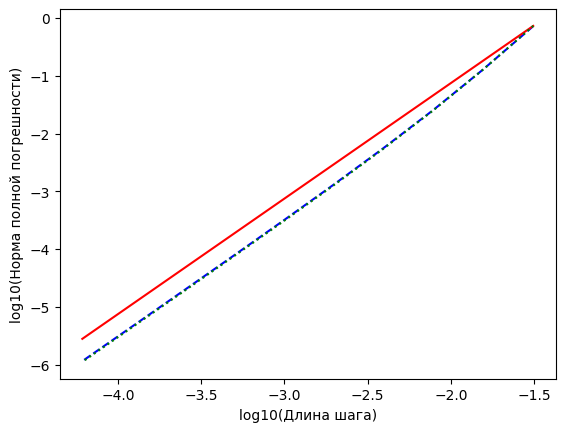

In [8]:
# График зависимости нормы точной погрешности в конце отрезка от шага h = 1/2^k
def graphPow2():
  Norm_RK1 = []
  Norm_M = []
  H = []
  for k in range(5, 15):
    h = 1 / (2 ** k)
    H.append(np.log10(h))
    res_RK1 = methodRK(y_1RK, h, x0)
    res_M = methodRK(y_M, h, x0)
    Norm_RK1.append(np.log10(np.linalg.norm([res_RK1[-1][i]-y_true[i] for i in range(4)])))
    Norm_M.append(np.log10(np.linalg.norm([res_M[-1][i]-y_true[i] for i in range(4)])))
  print('H:', H)
  print('Norm_RK1:', Norm_RK1)  
  print('Norm_M:', Norm_M)  
  x = np.linspace(0,0.06,100)
  y = (Norm_M[0]) + 2*(H-H[0])
  fig, ax = plt.subplots()
  ax.plot(H, Norm_RK1, color='b', linestyle='--')
  ax.plot(H, y, 'r')
  #ax.plot(x, y1, 'r', linestyle='--')
  ax.plot(H, Norm_M, color='g', linestyle=':')
  plt.xlabel("log10(Длина шага)")
  plt.ylabel("log10(Норма полной погрешности)")
  return H

H = graphPow2()

In [9]:
# Полная погрешность
def fullError(method, h, x0):
  res1 = methodRK(method, h, x0)[-1]
  res2 = methodRK(method, h/2, x0)[-1]
  R1 = [4/3*(res1[i]-res2[i]) for i in range(4)]
  return (np.linalg.norm(R1))

In [10]:
def optStep(method, h, x0):
    R = fullError(method, h, x0)
    h_opt = h * ((tol / R) ** (1/2))
    N_opt = int((x1 - x0) / h_opt)
    h = (x1-x0)/N_opt
    R = fullError(method, h, x0)
    print(h)
    y = methodRK(method, h, x0)
    res = y[-1]
    print(res)
    print([abs((np.array(y_true) - np.array(res))[i])<tol for i in range(4)])
    print(R, R<tol)
    print('Норма погрешности:', np.linalg.norm([y_true[i]-res[i] for i in range(4)]))
    print('Длина шага:', h_opt)
    print('Количество шагов:', N_opt)
    return (h, y)

### Для первого метода Рунге-Кутты  -- метода-оппонента
print('метод РК1 1/200')
h_optRK, y_RKopt = optStep(y_1RK, 1/200, 0)

### Для метода с=0.7
print('метод с=0.7 1/200')
h_optM, y_Mopt = optStep(y_M, 1/200, 0)


метод РК1 1/200
0.00016051879675109954
[0.876029280029324, 0.8199312424497841, 3.132355824418507, 0.991202680816351]
[True, True, True, True]
7.979523885278484e-06 True
Норма погрешности: 7.970028592870818e-06
Длина шага: 0.00016051782652527858
Количество шагов: 31149
метод с=0.7 1/200
0.00016196954972465177
[0.8760293431788876, 0.8199313931053022, 3.132355882302119, 0.9912025483243458]
[True, True, True, True]
7.875211294999204e-06 True
Норма погрешности: 7.865139140847915e-06
Длина шага: 0.0001619686476492324
Количество шагов: 30870


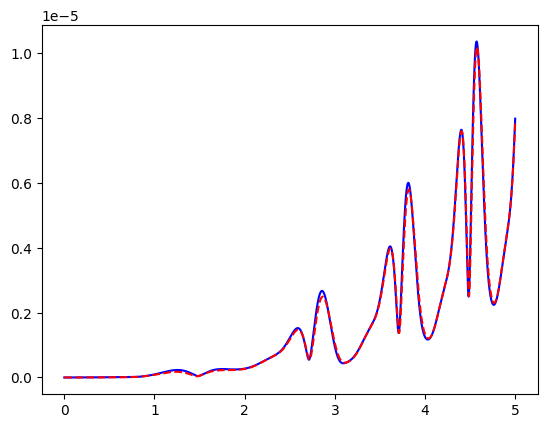

In [11]:
# График зависимости точной полной погрешности от независимой переменной x при решении с h_opt
def graphX():
  XRK = np.arange(0, 5, h_optRK)
  XM = np.arange(0, 5+h_optM, h_optM)
  y_trueRK = [f_solution(XRK[i]) for i in range(len(XRK))]
  R_RK = np.array(y_RKopt)-np.array(y_trueRK)
  R_RK = [np.linalg.norm(R_RK[i]) for i in range(len(R_RK))]
  y_trueM = [f_solution(XM[i]) for i in range(len(XM))]
  R_M = np.array(y_Mopt)-np.array(y_trueM)
  R_M = [np.linalg.norm(R_M[i]) for i in range(len(R_M))]
  
  fig, ax = plt.subplots()
  ax.plot(XRK, R_RK, color='b', linestyle='-') # метод-оппонент
  ax.plot(XM, R_M, color='r', linestyle='--') # метод с с = 0,7

graphX()

In [12]:
# Поиск начального шага
def firstStep(x0, y0):
  K1 = f_mean(x0, y0)
  delta = (1/max(abs(x0), 5)) ** 3 + np.linalg.norm(K1) ** 3
  h = (rtol / delta) ** (1 / 3)
  if (K1.count(0) <= 2):
    return h
  u1 = [y0[i] + h * K1[i] for i in range(4)]
  K2 = f_mean(x0+h, u1)
  delta = (1/max(abs(x0+h), abs(x0+1/2**4))) ** 3 + np.linalg.norm(K2) ** 3
  return min(h, (rtol / delta) ** (1 / 3))


In [13]:
# Локальная погрешность Рунге
def localErrorr(method, xk, yk, h):
  y_1 = method(xk, h, yk)
  y_2_1 = method(xk, h/2, yk)
  y_2 = method(xk+h/2, h/2, y_2_1)
  return (np.linalg.norm(
    ([4/3 * abs(y_2[i] - y_1[i]) for i in range(4)])), y_1, y_2, y_2_1
  )

In [14]:
#Алгоритм удвоения и деления шага пополам
def h_choise (r, y_1, y_2, y_2_1, h, hmax):
    k = max(np.linalg.norm(np.array(y_1)), np.linalg.norm(np.array(y_2))) * rtol + atol
    if r/h > k * 2:
        return (False, h/2, y_2_1)
    if k < r/h:
        return (True, h/2, y_2)
    if k / 4 <= r/h:
        return (True, h, y_1)
    return (True, min(h * 2, hmax), y_1)


In [15]:
# Автоматический выбор шага
def Auto_h_method (method, x0, y0, h_max):
    h = []
    x=[]
    y=[]
    n = [] #надежность
    h.append(firstStep(x0, y0))
    x.append(x0)
    y.append(y0)
    counter=0
    while x[-1] < 5:
        r, y_1, y_2, y_2_1 = localErrorr(method, x[-1], y[-1], h[-1])
        counter+=3
        ch, new_h, new_y = h_choise (r, y_1, y_2, y_2_1, h[-1], h_max)
        if not ch:
            h[-1] = new_h
            y[-1] = new_y
        else:
            if x[-1]+h[-1] >= 5:
                y.append(method(x[-1], x1 - x[-1], y[-1]))
                x.append(x1) 
                h.append(x1-x[-1])
                n.append(np.linalg.norm((np.array(f_solution(x[-1]))-np.array(y[-1]))/r))
                break
            x.append(x[-1]+h[-1]) 
            h.append(new_h)
            y.append(new_y)
            n.append(np.linalg.norm((np.array(f_solution(x[-1]))-np.array(y[-1]))/r))

    print('y[-1]:', y[-1])
    return(x, y, h, counter, n)

xRK, yRK, hRK, kRK, nRK = Auto_h_method (y_1RK, x0, y0, 1/2**4)
xM, yM, hM, kM, nM = Auto_h_method (y_M, x0, y0, 1/2**4)
               


y[-1]: [0.876010190681276, 0.8199031970208275, 3.132377118081189, 0.9912005635054221]
y[-1]: [0.876022764916376, 0.8199221644269146, 3.1323625629008993, 0.9912022195124103]


Text(0.5, 1.0, 'График решения Y4')

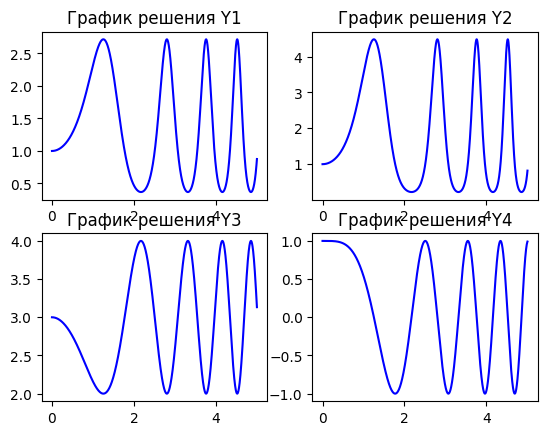

In [16]:
#1 метод рунге-кутты
yRK1, yRK2, yRK3, yRK4 = [], [], [], []
for i in range(len(yRK)):
    yRK1.append(yRK[i][0])
    yRK2.append(yRK[i][1])
    yRK3.append(yRK[i][2])
    yRK4.append(yRK[i][3])
fig, (axs1, axs2) = plt.subplots(2, 2)
axs1[0].plot(xRK, yRK1, 'b')
axs1[0].set_title('График решения Y1')

axs1[1].plot(xRK, yRK2, 'b')
axs1[1].set_title('График решения Y2')

axs2[0].plot(xRK, yRK3, 'b')
axs2[0].set_title('График решения Y3')

axs2[1].plot(xRK, yRK4, 'b')
axs2[1].set_title('График решения Y4')

Text(0.5, 1.0, 'График решения Y4')

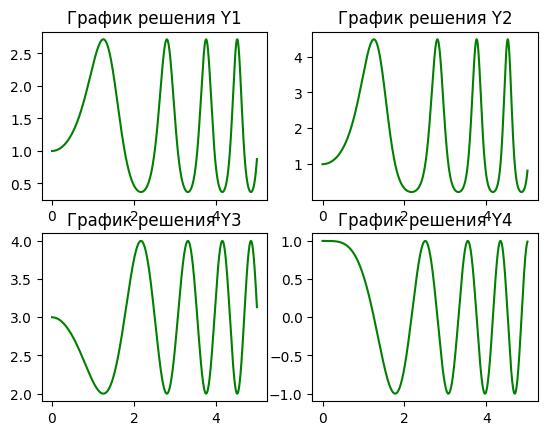

In [17]:
#метод c=0.7
yM1, yM2, yM3, yM4 = [], [], [], []
for i in range(len(yM)):
    yM1.append(yM[i][0])
    yM2.append(yM[i][1])
    yM3.append(yM[i][2])
    yM4.append(yM[i][3])
fig, (axs1, axs2) = plt.subplots(2, 2)
axs1[0].plot(xM, yM1, 'g')
axs1[0].set_title('График решения Y1')

axs1[1].plot(xM, yM2, 'g')
axs1[1].set_title('График решения Y2')

axs2[0].plot(xM, yM3, 'g')
axs2[0].set_title('График решения Y3')

axs2[1].plot(xM, yM4, 'g')
axs2[1].set_title('График решения Y4')

Text(0.5, 1.0, 'График зависимости h от независимой переменной метода с=0.7')

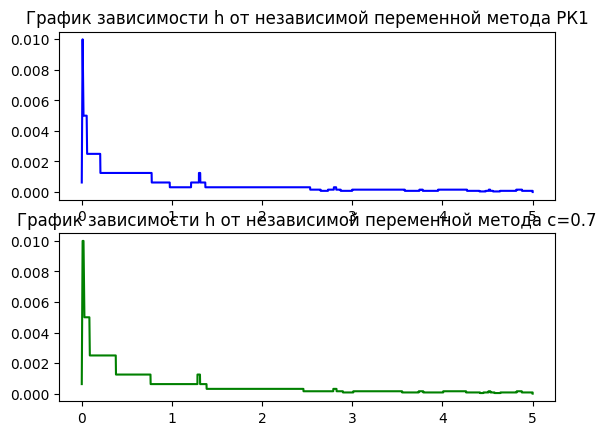

In [18]:
fig, (axs1, axs2) = plt.subplots(2, 1)
axs1.plot(xRK, hRK, 'b')
axs1.set_title('График зависимости h от независимой переменной метода РК1')

axs2.plot(xM, hM, 'g')
axs2.set_title('График зависимости h от независимой переменной метода с=0.7')


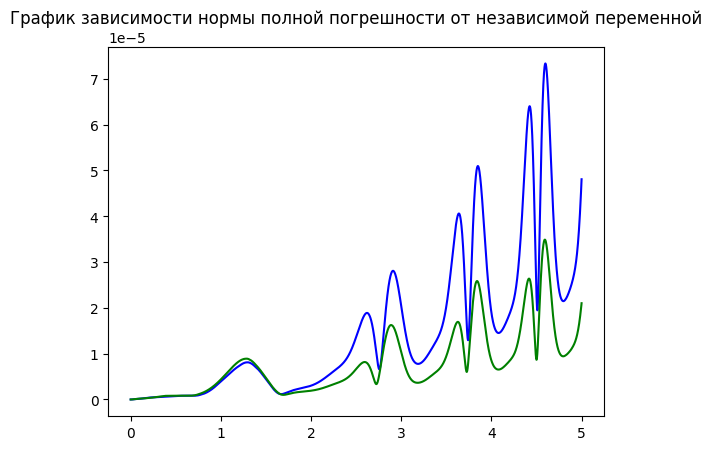

In [19]:
yRK_norm = [np.linalg.norm(np.array(yRK[i]) - np.array(f_solution(xRK[i]))) for i in range(len(yRK))]
yM_norm = [np.linalg.norm(np.array(yM[i]) - np.array(f_solution(xM[i]))) for i in range(len(yM))]

fig, axs1 = plt.subplots()
axs1.plot(xRK, yRK_norm, 'b')
axs1.set_title('График зависимости нормы полной погрешности от независимой переменной')

axs1.plot(xM, yM_norm, 'g')

y[-1]: [0.8742636229924917, 0.8172647701329413, 3.134374137981927, 0.9910097131272158]
y[-1]: [0.8746001740923154, 0.817791003335329, 3.1339092963591195, 0.9910973271627938]
y[-1]: [0.8757975771813836, 0.8195846580575051, 3.1326161540417834, 0.9911788700370647]
y[-1]: [0.8758970575332143, 0.8197329618710162, 3.132502919476923, 0.9911897165584014]
y[-1]: [0.876010190681276, 0.8199031970208275, 3.132377118081189, 0.9912005635054221]
y[-1]: [0.876022764916376, 0.8199221644269146, 3.1323625629008993, 0.9912022195124103]
y[-1]: [0.8760304588942381, 0.8199335873440969, 3.132354434422025, 0.9912025336085966]
y[-1]: [0.8760314836809058, 0.8199351433577141, 3.1323532060207224, 0.9912026730310172]
y[-1]: [0.8760325488959538, 0.8199367479244657, 3.1323520288394615, 0.9912027859796747]
y[-1]: [0.8760326648043121, 0.8199369225604828, 3.1323518954680027, 0.9912028004427287]
[8679, 29133, 92367, 277194, 907746]
[8769, 28536, 89565, 285273, 909405]


Text(0.5, 1.0, 'График зависимости количества обращений к правой части от rtol')

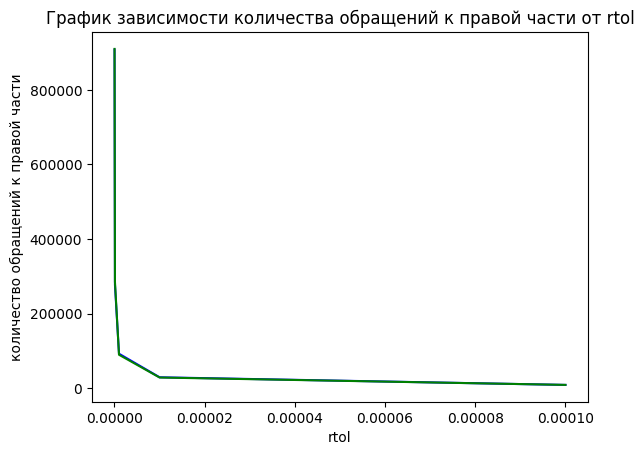

In [20]:
Counter_RK=[]
Counter_M=[]
RTOL = []
for i in range(4, 9):
    rtol=10**(-i)
    xRK, yRK, hRK, kRK, n_RK = Auto_h_method (y_1RK, x0, y0, 1/2**4)
    xM, yM, hM, kM, n_M = Auto_h_method (y_M, x0, y0, 1/2**4)
    Counter_RK.append(kRK)
    Counter_M.append(kM)
    RTOL.append(rtol)
fig, axs1 = plt.subplots()
print(Counter_RK)
print(Counter_M)
axs1.plot(RTOL, Counter_RK, 'b')
axs1.plot(RTOL, Counter_M, 'g')
plt.xlabel("rtol")
plt.ylabel("количество обращений к правой части")
axs1.set_title('График зависимости количества обращений к правой части от rtol')
    

y[-1]: [0.8742636229924917, 0.8172647701329413, 3.134374137981927, 0.9910097131272158]
y[-1]: [0.8746001740923154, 0.817791003335329, 3.1339092963591195, 0.9910973271627938]
y[-1]: [0.8757975771813836, 0.8195846580575051, 3.1326161540417834, 0.9911788700370647]
y[-1]: [0.8758970575332143, 0.8197329618710162, 3.132502919476923, 0.9911897165584014]
y[-1]: [0.876010190681276, 0.8199031970208275, 3.132377118081189, 0.9912005635054221]
y[-1]: [0.876022764916376, 0.8199221644269146, 3.1323625629008993, 0.9912022195124103]
y[-1]: [0.8760304588942381, 0.8199335873440969, 3.132354434422025, 0.9912025336085966]
y[-1]: [0.8760314836809058, 0.8199351433577141, 3.1323532060207224, 0.9912026730310172]
y[-1]: [0.8760325488959538, 0.8199367479244657, 3.1323520288394615, 0.9912027859796747]
y[-1]: [0.8760326648043121, 0.8199369225604828, 3.1323518954680027, 0.9912028004427287]


Text(0.5, 1.0, 'График зависимости глобальной погрешности от rtol')

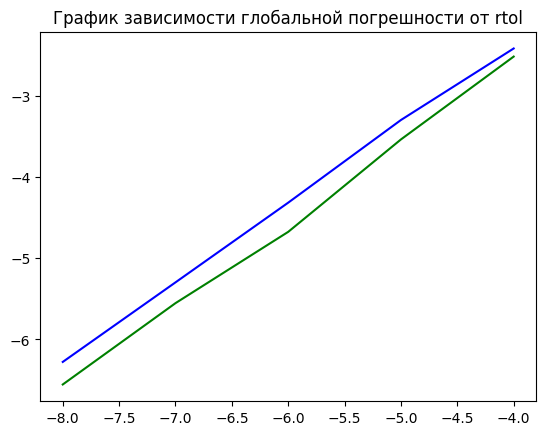

In [21]:
yRK_norm =[]
yM_norm = []
RTOL = []
for i in range(4, 9):
    rtol=10**(-i)
    xRK, yRK, hRK, kRK, n_RK = Auto_h_method (y_1RK, x0, y0, 1/2**4)
    xM, yM, hM, kM, n_M = Auto_h_method (y_M, x0, y0, 1/2**4)
    yRK_norm.append(np.log10(np.linalg.norm(np.array(yRK[-1])- np.array(f_solution(xRK[-1])))))
    yM_norm.append(np.log10(np.linalg.norm(np.array(yM[-1])- np.array(f_solution(xM[-1])))))
    RTOL.append(np.log10(rtol))

fig, axs1 = plt.subplots()
axs1.plot(RTOL, yRK_norm, 'b')
axs1.plot(RTOL, yM_norm, 'g')
axs1.set_title('График зависимости глобальной погрешности от rtol')


In [22]:
rtol = 10**(-6)
facmin = 0.5
fac = (1/4)**(1/3)
#реализация по Ричардсону - по факту то же, что и выше, но с большим количеством доп. переменных и коэффициентов регулировки шагов

In [23]:

# Локальная погрешность Ричардсона
def localErrorr_Rich(method, xk, yk, h):
  y_1 = method(xk, h, yk)
  y_2 = method(xk+h, h, y_1)
  w = method(xk, h*2, yk)
  return ((1/3)*np.linalg.norm(np.array(y_2)-np.array(w))), y_1, y_2
  

In [24]:
#Алгоритм выбора шага по Ричирадсону
def h_choise_Rich (err, h, facmax):
    h_new = h * min (facmax, max(facmin, fac * (rtol / err)**(1/3)))
    if err <= rtol:
        return (True, h_new, 1.5)
    return (False, h_new, 1)

In [25]:
# Автоматический выбор шага по Ричардсону
def Auto_h_Rich (method, x0, y0):
    facmax = 1.5
    h = []
    x=[]
    y=[]
    h.append(firstStep(x0, y0))
    x.append(x0)
    y.append(y0)
    while x[-1] < 5:
        err, y_1, y_2 = localErrorr_Rich(method, x[-1], y[-1], h[-1])
        ch, new_h, facmax = h_choise_Rich (err, h[-1], facmax)
        if not ch:
            h[-1] = new_h
        else:
            if x[-1]+h[-1] >= 5:
                y.append(method(x[-1], x1 - x[-1], y[-1]))
                x.append(x1) 
                h.append(x1-x[-1])
                break
            x.append(x[-1]+h[-1]) 
            x.append(x[-1]+h[-1]) 
            h.append(h[-1])
            h.append(new_h)
            y.append(y_1)
            y.append(y_2)

    print('y[-1]:', y[-1])
    return(x, y, h)

xRK_R, yRK_R, hRK_R = Auto_h_Rich (y_1RK, x0, y0)
xM_R, yM_R, hM_R = Auto_h_Rich (y_M, x0, y0)

y[-1]: [0.8799868196867788, 0.8254408616207173, 3.1278477207019364, 0.9918194619077422]
y[-1]: [0.8757586095091656, 0.8195170706385712, 3.1326622885630786, 0.9911787171171061]


Text(0.5, 1.0, 'График зависимости h от независимой переменной метода с=0.7')

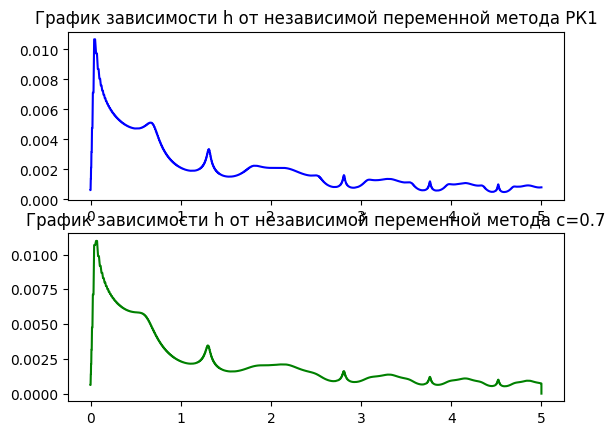

In [26]:
fig, (axs1, axs2) = plt.subplots(2, 1)
axs1.plot(xRK_R, hRK_R, 'b')
axs1.set_title('График зависимости h от независимой переменной метода РК1')

axs2.plot(xM_R, hM_R, 'g')
axs2.set_title('График зависимости h от независимой переменной метода с=0.7')

y[-1]: [0.8668929340147505, 0.8057554351704976, 3.142783608371669, 0.9904043040075267]
y[-1]: [0.8856022430387198, 0.8325795000977879, 3.1213218045491375, 0.9931211836249877]
y[-1]: [0.8739278471934371, 0.8167190855074635, 3.134752669472872, 0.9910044320626105]
y[-1]: [0.8848930721397522, 0.8322421548154633, 3.1222678850314223, 0.9925872803701987]
y[-1]: [0.8799868196867788, 0.8254408616207173, 3.1278477207019364, 0.9918194619077422]
y[-1]: [0.8757586095091656, 0.8195170706385712, 3.1326622885630786, 0.9911787171171061]
y[-1]: [0.8759417177119939, 0.8197978700206475, 3.132455749474939, 0.9911942978567612]
y[-1]: [0.8773866904866642, 0.8218312292027717, 3.1308070470281217, 0.9914114186784229]
y[-1]: [0.8775174150658662, 0.8220199105612619, 3.130658488446178, 0.9914285803334233]
y[-1]: [0.8760204701244113, 0.8199182228875816, 3.132365750383071, 0.9912016921401251]


Text(0.5, 1.0, 'График зависимости глобальной погрешности от rtol')

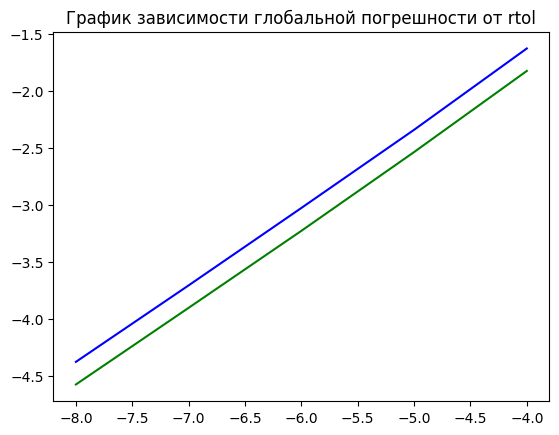

In [27]:
yRK_norm_R =[]
yM_norm_R = []
RTOL_R = []
for i in range(4, 9):
    rtol=10**(-i)
    xRK_R, yRK_R, hRK_R = Auto_h_Rich (y_1RK, x0, y0)
    xM_R, yM_R, hM_R = Auto_h_Rich (y_M, x0, y0)
    yRK_norm_R.append(np.log10(np.linalg.norm(np.array(yRK_R[-1])- np.array(f_solution(xRK_R[-1])))))
    yM_norm_R.append(np.log10(np.linalg.norm(np.array(yM_R[-1])- np.array(f_solution(xM_R[-1])))))
    RTOL_R.append(np.log10(rtol))

fig, axs1 = plt.subplots()
axs1.plot(RTOL_R, yRK_norm_R, 'b')
axs1.plot(RTOL_R, yM_norm_R, 'g')
axs1.set_title('График зависимости глобальной погрешности от rtol')


In [28]:
#метод Ческино
def method_Chescino(xk, yk, h):
    if yk[0] < 0:
        print('ops') 
    K1 = f_mean(xk, yk)
    K2 = f_mean(xk + h/4, np.array(yk)+ h*np.array(K1)/4)
    K3 = f_mean(xk + h/2, np.array(yk)+ h*np.array(K2)/2)
    yn = np.array(yk) + h * (np.array(K1) - 2*np.array(K2) + 2*np.array(K3))
    K4 = f_mean(xk + h, yn)
    #err = np.linalg.norm(np.array(y_n)-np.array(yn))/np.linalg.norm(yn)
    err = np.linalg.norm((1/6 - 1)* np.array(K1) + 2* np.array(K2) + (2/3 - 2)*np.array(K3) + np.array(K4)/6)
    return (yn, err)

In [29]:
rtol = 10**(-6)
facmin = 0.2
fac = 0.9

In [30]:
# Автоматический выбор шага для Ческино
def Auto_h_CH (x0, y0):
    facmax = 1.5
    h = []
    x=[]
    y=[]
    h.append(firstStep(x0, y0))
    x.append(x0)
    y.append(y0)
    while x[-1] < 5:
        yn, err = method_Chescino(x[-1], y[-1], h[-1])
        ch, new_h, facmax = h_choise_Rich (err, h[-1], facmax)
        if x[-1]+h[-1] >= 5:
            yn, err = method_Chescino(x[-1], y[-1], x1 - x[-1])
            y.append(yn)
            x.append(x1) 
            h.append(x1-x[-1])
            break
        x.append(x[-1]+h[-1])
        h.append(new_h)
        y.append(yn)
            

    print('y[-1]:', y[-1])
    print(y_true)
    print(np.array(y_true)-np.array(y[-1])<tol)
    return(x, y, h)

xCH, yCH, hCH = Auto_h_CH (x0, y0)

y[-1]: [0.87604067 0.81994895 3.13234286 0.99120366]
[0.8760327962563325, 0.819937119544356, 3.132351750097773, 0.9912028118634736]
[ True  True  True  True]


Text(0.5, 1.0, 'График решения Y4')

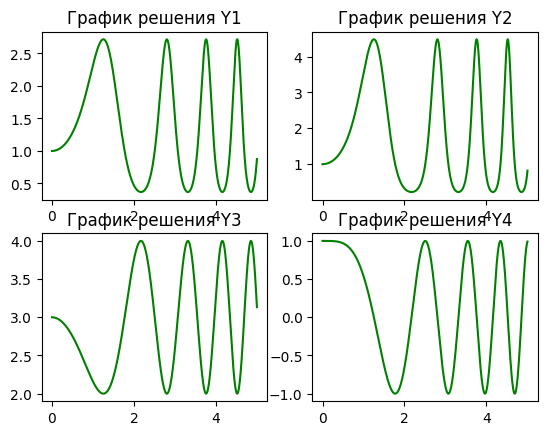

In [31]:
yCH1, yCH2, yCH3, yCH4 = [], [], [], []
for i in range(len(yCH)):
    yCH1.append(yCH[i][0])
    yCH2.append(yCH[i][1])
    yCH3.append(yCH[i][2])
    yCH4.append(yCH[i][3])
fig, (axs1, axs2) = plt.subplots(2, 2)
axs1[0].plot(xCH, yCH1, 'g')
axs1[0].set_title('График решения Y1')

axs1[1].plot(xCH, yCH2, 'g')
axs1[1].set_title('График решения Y2')

axs2[0].plot(xCH, yCH3, 'g')
axs2[0].set_title('График решения Y3')

axs2[1].plot(xCH, yCH4, 'g')
axs2[1].set_title('График решения Y4')

Text(0.5, 1.0, 'График зависимости h от независимой переменной метода РК1')

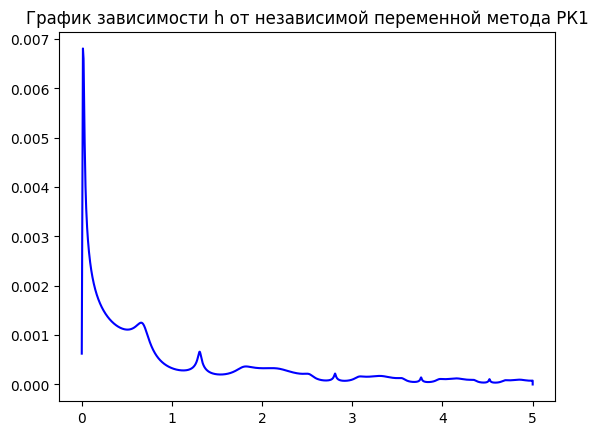

In [32]:
fig, axs1 = plt.subplots()
axs1.plot(xCH, hCH, 'b')
axs1.set_title('График зависимости h от независимой переменной метода РК1')


y[-1]: [0.87688503 0.82121696 3.13139119 0.99129361]
[0.8760327962563325, 0.819937119544356, 3.132351750097773, 0.9912028118634736]
[ True  True False  True]
y[-1]: [0.87611294 0.82005749 3.13226131 0.9912114 ]
[0.8760327962563325, 0.819937119544356, 3.132351750097773, 0.9912028118634736]
[ True  True False  True]
y[-1]: [0.87604067 0.81994895 3.13234286 0.99120366]
[0.8760327962563325, 0.819937119544356, 3.132351750097773, 0.9912028118634736]
[ True  True  True  True]
y[-1]: [0.87603358 0.81993829 3.13235087 0.9912029 ]
[0.8760327962563325, 0.819937119544356, 3.132351750097773, 0.9912028118634736]
[ True  True  True  True]
y[-1]: [0.87603287 0.81993724 3.13235166 0.99120282]
[0.8760327962563325, 0.819937119544356, 3.132351750097773, 0.9912028118634736]
[ True  True  True  True]


Text(0.5, 1.0, 'График зависимости глобальной погрешности от rtol')

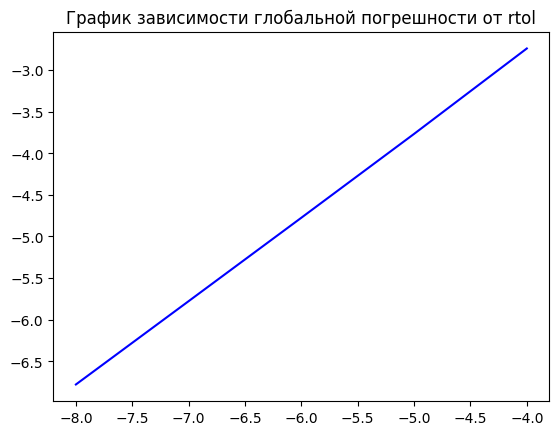

In [33]:
yCH_norm =[]
RTOL_CH = []
for i in range(4, 9):
    rtol=10**(-i)
    xCH, yCH, hCH = Auto_h_CH (x0, y0)
    yCH_norm.append(np.log10(np.linalg.norm(np.array(yCH[-1])- np.array(f_solution(xCH[-1])))))
    RTOL_CH.append(np.log10(rtol))

fig, axs1 = plt.subplots()
axs1.plot(RTOL_CH, yCH_norm, 'b')
axs1.set_title('График зависимости глобальной погрешности от rtol')